In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Parte 1: Analisi 

Caricare il dataset e denominarlo con una variabile chiamata “dataset”

In [64]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BDA/data/bike.csv', sep=';')

In [65]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    int64  
 1   yr          731 non-null    int64  
 2   mnth        731 non-null    int64  
 3   holiday     731 non-null    int64  
 4   weekday     731 non-null    int64  
 5   workingday  731 non-null    int64  
 6   weathersit  731 non-null    int64  
 7   temp        731 non-null    float64
 8   atemp       731 non-null    float64
 9   hum         731 non-null    float64
 10  windspeed   731 non-null    float64
 11  casual      731 non-null    int64  
 12  registered  731 non-null    int64  
 13  cnt         731 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 80.1 KB


In [66]:
dataset.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Indicare quante sono le biciclette noleggiate in primavera, estate, autunno, e inverno 

In [67]:
dataset.groupby(by='season').size()

season
1    181
2    184
3    188
4    178
dtype: int64

Raggruppando i noleggi per mesi e per anni e contando i noleggi effettuati è possibile verificare se ci sono andamenti particolari, ovvero: c’è un forte scostamento tra i noleggi effettuati un anno rispetto al secondo? C’è un forte scostamento tra i mesi?

In [68]:
xtab = pd.crosstab(dataset['mnth'], dataset['yr'])

In [69]:
xtab

yr,0,1
mnth,,
1,31,31
2,28,29
3,31,31
4,30,30
5,31,31
6,30,30
7,31,31
8,31,31
9,30,30


Realizzare un’immagine grafica  che rappresenti in maniera efficace la richiesta del punto 3

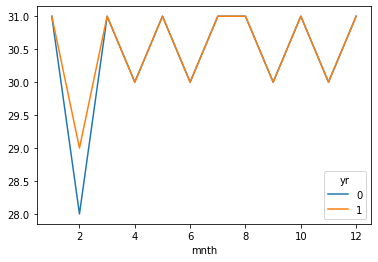

In [70]:
xtab.plot()

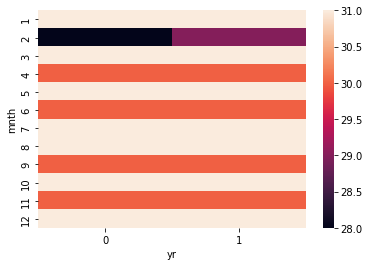

In [71]:
sns.heatmap(xtab)

# Parte 2: Trasformazione e Predizione

Si vuole predire il  tempo (weathersit) nella città sulla base degli altri valori del dataset.
Dividere “dataset” in modo che 2/3 degli elementi casualmente scelti siano contenuti in un nuovo dataset “train” e 1/3 nel dataset “test”.

Valutare l’accuracy ottenuta con il modello LogisticRegression
(from sklearn.linear_model import LogisticRegression)

In [72]:
train, test = train_test_split(dataset, train_size=2/3, random_state=1)

In [73]:
X_tr = train.drop(columns='weathersit')
y_tr = train['weathersit']
X_ts = test.drop(columns='weathersit')
y_ts = test['weathersit']

In [74]:
clf = LogisticRegression()
y_pr = clf.fit(X_tr, y_tr).predict(X_ts)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [75]:
metrics.accuracy_score(y_ts, y_pr)

0.6311475409836066

Cosa si scopre analizzando la confusion matrix?

In [76]:
metrics.confusion_matrix(y_ts, y_pr)

array([[138,   7,   2],
       [ 75,  13,   2],
       [  2,   2,   3]])

In [77]:
metrics.recall_score(y_ts, y_pr, average=None)

array([0.93877551, 0.14444444, 0.42857143])

Che valore di accuratezza si ottiene con un 5 Fold cross validation?

E’ un valore più o meno attendibile del precedente? Perché?

In [78]:
X = pd.concat([X_tr, X_ts])
y = pd.concat([y_tr, y_ts])

In [79]:
xval = cross_val_score(clf, X, y, scoring='accuracy', cv=5, n_jobs=-1)

In [80]:
xval.mean()

0.648429782872053

In [81]:
y_pr = cross_val_predict(clf, X, y, cv=5, n_jobs=-1)

In [82]:
metrics.accuracy_score(y, y_pr)

0.6484268125854993

In [83]:
metrics.confusion_matrix(y, y_pr)

array([[421,  38,   4],
       [195,  47,   5],
       [  5,  10,   6]])

In [84]:
metrics.recall_score(y, y_pr, average=None)

array([0.90928726, 0.1902834 , 0.28571429])

Se si utilizza un modello basato su Decision Tree che valore di accuratezza  si ottiene utilizzando entrambi i metodi? Cambia qualcosa nella confusion matrix?

In [85]:
clf = DecisionTreeClassifier().fit(X_tr, y_tr)

In [86]:
y_pr = clf.predict(X_ts)

In [87]:
metrics.accuracy_score(y_ts, y_pr)

0.6762295081967213

In [88]:
metrics.confusion_matrix(y_ts, y_pr)

array([[118,  29,   0],
       [ 40,  45,   5],
       [  2,   3,   2]])

In [89]:
metrics.recall_score(y_ts, y_pr, average=None)

array([0.80272109, 0.5       , 0.28571429])

In [90]:
cross_val_score(clf, X, y, scoring='accuracy', cv=5, n_jobs=-1).mean()

0.6935607119560153

In [91]:
y_pr = cross_val_predict(clf, X, y, cv=5, n_jobs=-1)

In [92]:
metrics.accuracy_score(y, y_pr)

0.7113543091655267

In [93]:
metrics.confusion_matrix(y, y_pr)

array([[360, 103,   0],
       [ 92, 149,   6],
       [  2,   8,  11]])

In [94]:
metrics.recall_score(y, y_pr, average=None)

array([0.7775378 , 0.60323887, 0.52380952])

Creare un nuovo attributo “tempSimpl” con due valori = 2 se la temperatura percepita (atemp) è maggiore della media, 1 se inferiore alla media. Si elimini poi la colonna atemp e si effettui una valutazione 5 cross fold usando un modello basato su Decision Tree. Che accuratezza si ottiene?

In [95]:
dataset['tempSimpl'] = np.where(dataset['atemp'] > dataset['atemp'].mean(), 2, 1)
dataset.drop(columns='atemp', inplace=True)

In [96]:
dataset['tempSimpl'].describe()

count    731.000000
mean       1.511628
std        0.500207
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        2.000000
Name: tempSimpl, dtype: float64

In [97]:
X = dataset.drop(columns='weathersit')
y = dataset['weathersit']
cross_val_score(DecisionTreeClassifier(), X, y, scoring='accuracy', cv=5, 
                n_jobs=-1).mean()

0.674643556052558

Si modifichi  il “dataset” creando il dataset “simplified”. In questo si introduca un nuovo attributo “dayVsNight” con due valori: 1 se il valore di hr è compreso tra 8 e 20; 2 negli altri casi. Si elimini poi hr. Si eliminino pure le colonne casual, registered e cnt. Si provi il dataset con il DecisionTree e una valutazione 5Fold. Che accuratezza si ottiene? Per quale motivo?

In [98]:
simplified = dataset
# simplified['dayVsNight'] = np.where((simplified['hr'] >= 8) & (simplified['hr'] <= 20), 1, 2)
# simplified.drop(columns=['hr', 'casual', 'registered', 'cnt'], inplace=True)
simplified.drop(columns=['casual', 'registered', 'cnt'], inplace=True)

In [99]:
simplified.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,tempSimpl
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.627894,0.190486,1.511628
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.142429,0.077498,0.500207
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.000000,0.022392,1.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.520000,0.134950,1.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.626667,0.180975,2.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.730209,0.233214,2.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.972500,0.507463,2.000000


In [100]:
X = simplified.drop(columns='weathersit')
y = simplified['weathersit']
cross_val_score(DecisionTreeClassifier(), X, y, scoring='accuracy', cv=5, 
                n_jobs=-1).mean()

0.6963470319634703